# Data Preprocessing

In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [685]:
df = pd.read_csv('data/required_feature.csv')
df

,Crop,Season,State,Area,Production,Annual_Rainfall
0,Arecanut,Whole Year,Assam,73814.0,56708,2051.4
1,Arhar/Tur,Kharif,Assam,6637.0,4685,2051.4
2,Castor seed,Kharif,Assam,796.0,22,2051.4
3,Coconut,Whole Year,Assam,19656.0,126905000,2051.4
4,Cotton(lint),Kharif,Assam,1739.0,794,2051.4
...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,4000.0,2000,1498.0
19685,Wheat,Rabi,Nagaland,1000.0,3000,1498.0
19686,Maize,Kharif,Jammu and Kashmir,310883.0,440900,1356.2
19687,Rice,Kharif,Jammu and Kashmir,275746.0,5488,1356.2


In [686]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.drop(columns=['Production'], inplace=True)
numeric_col = list(numeric_df.columns)

categorical_df = df.select_dtypes(exclude=['number'])
categorical_col = list(categorical_df.columns)

print(numeric_col, categorical_col)

['Area', 'Annual_Rainfall'] ['Crop', 'Season', 'State']


In [687]:
columns = categorical_col
print(columns, '\n')

for i in columns:
    print(i)
    print(df[i].unique())
    print("*" * 50)

['Crop', 'Season', 'State'] 

Crop
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']
**************************************************
Season
['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']
**************************************************
State
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra P

---

## Remove leading or trailing spaces from categorical column values

In [688]:
df['Crop'] = df['Crop'].str.strip()
df['Season'] = df['Season'].str.strip()
df['State'] = df['State'].str.strip()


## Remove those rows which have unnecessary crop values

In [689]:
temp_crop_values = ["Oilseeds total", "other oilseeds", "Other Cereals", "Other Rabi pulses", "Other Kharif pulses", "Other Summer Pulses"]

df = df[~df["Crop"].isin(temp_crop_values)]

In [690]:
columns = categorical_col
print(columns, '\n')

for i in columns:
    print(i)
    print(df[i].unique())
    print("*" * 50)

['Crop', 'Season', 'State'] 

Crop
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)' 'Safflower'
 'Sannhamp' 'Sunflower' 'Urad' 'Peas & beans (Pulses)' 'Cowpea(Lobia)'
 'Guar seed' 'Moth']
**************************************************
Season
['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']
**************************************************
State
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'


# Understanding each feaure individually

## Crop

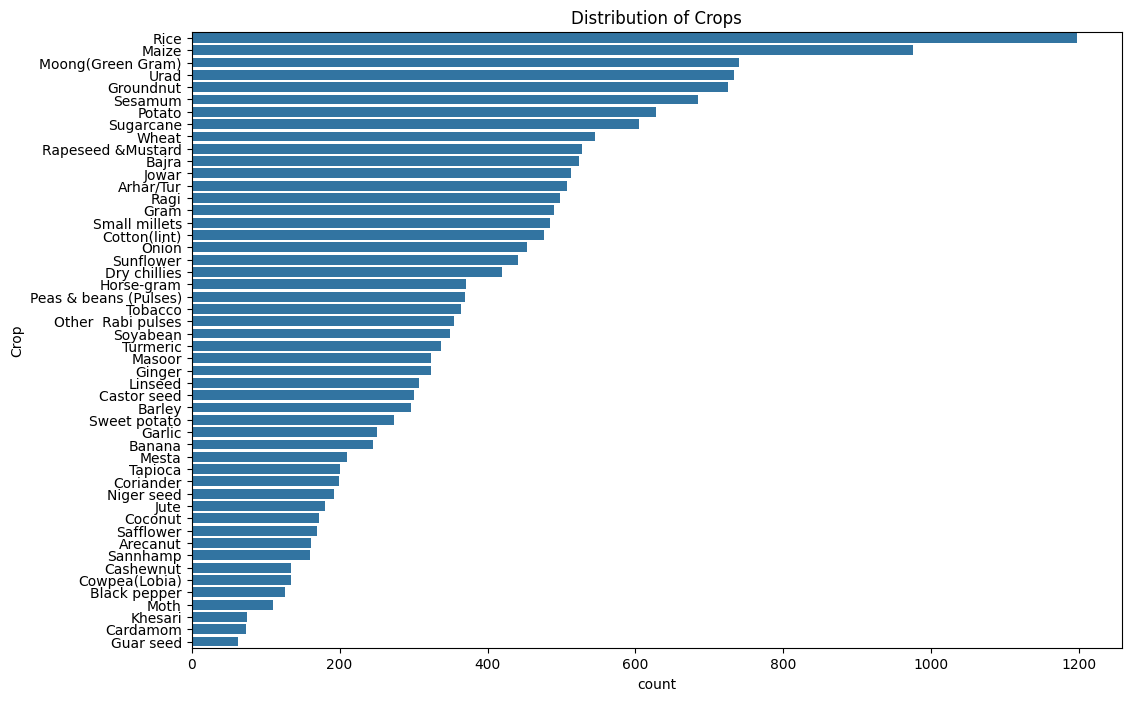

In [691]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Crop', data=df, order=df['Crop'].value_counts().index)
plt.title("Distribution of Crops")
plt.show()

## Season

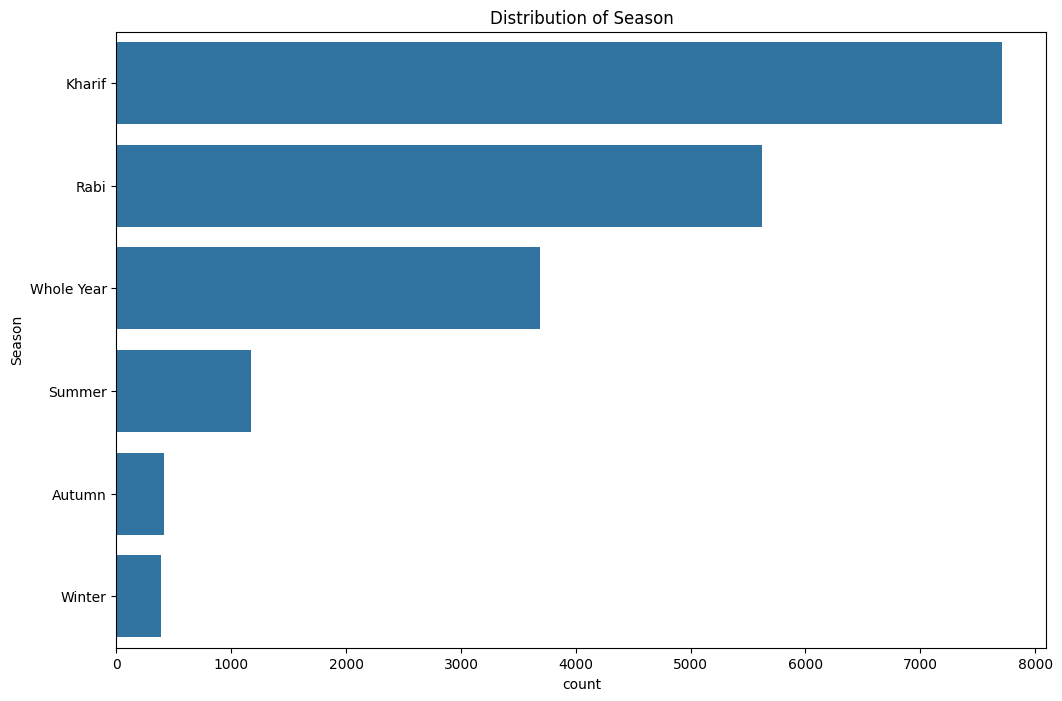

In [692]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Season', data=df, order=df['Season'].value_counts().index)
plt.title("Distribution of Season")
plt.show()

## State

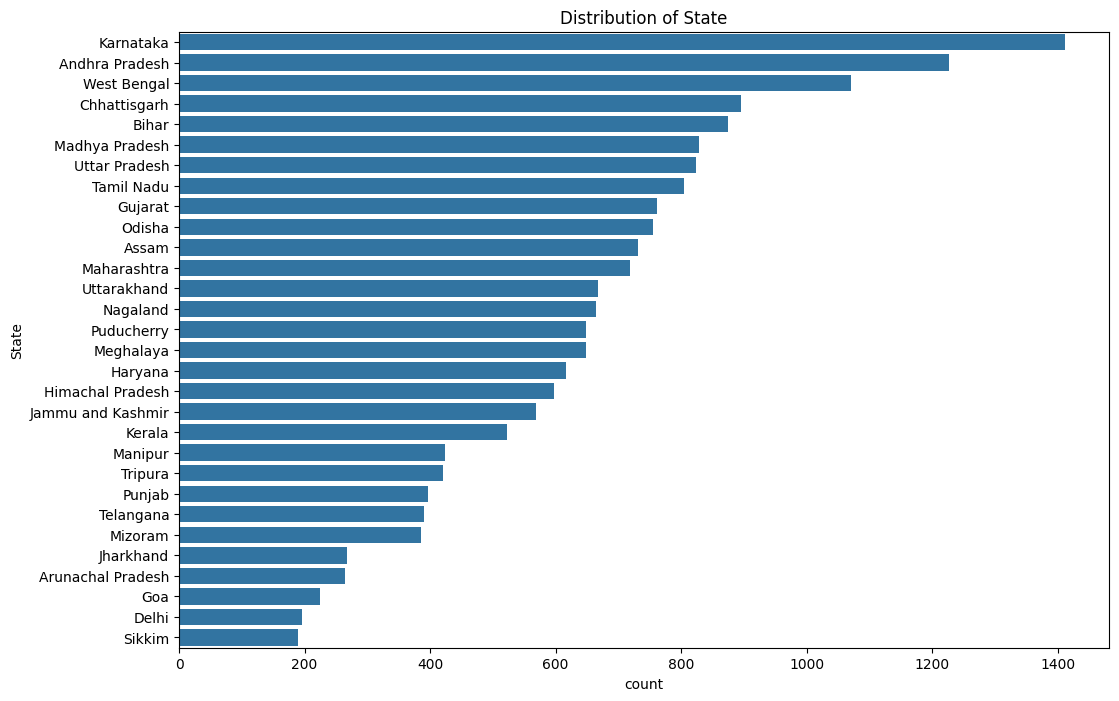

In [693]:
plt.figure(figsize=(12, 8))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.title("Distribution of State")
plt.show()

## Area

In [694]:
df['Area'].describe()

count    1.899600e+04
mean     1.852562e+05
std      7.449837e+05
min      5.000000e-01
25%      1.448000e+03
50%      9.810500e+03
75%      7.967575e+04
max      5.080810e+07
Name: Area, dtype: float64

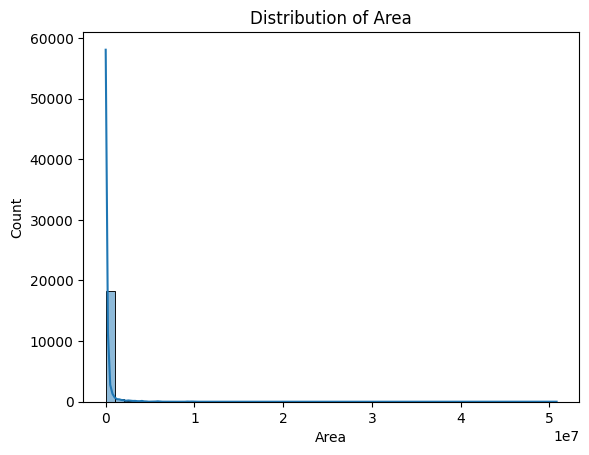

In [695]:
sns.histplot(df['Area'], bins=50, kde=True)
plt.title('Distribution of Area')
plt.show()

## Production

In [696]:
df['Production'].describe()

count    1.899600e+04
mean     1.703373e+07
std      2.677935e+08
min      0.000000e+00
25%      1.492500e+03
50%      1.510700e+04
75%      1.304250e+05
max      6.326000e+09
Name: Production, dtype: float64

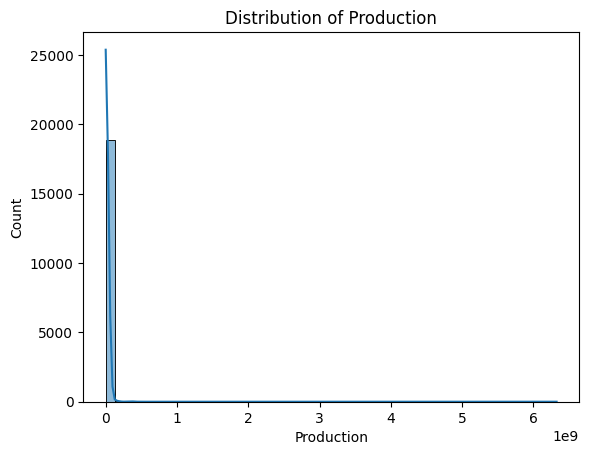

In [697]:
sns.histplot(df['Production'], bins=50, kde=True)
plt.title('Distribution of Production')
plt.show()

## Rainfall

count    18996.000000
mean      1435.405847
std        820.001293
min        301.300000
25%        935.600000
50%       1246.200000
75%       1635.900000
max       6552.700000
Name: Annual_Rainfall, dtype: float64

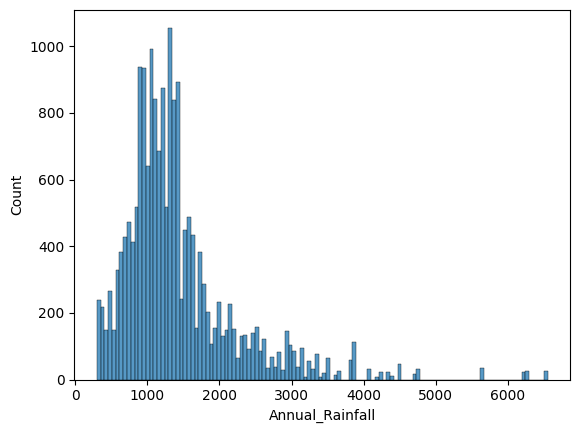

In [698]:
sns.histplot(df['Annual_Rainfall'])
df['Annual_Rainfall'].describe()

In [699]:
q1 = df['Annual_Rainfall'].quantile(0.25)
q3 = df['Annual_Rainfall'].quantile(0.75)

df['Annual_Rainfall'] = np.where(
    df['Annual_Rainfall'] < q1, 'Low',
    np.where(
        (df['Annual_Rainfall'] >= q1) & (df['Annual_Rainfall'] <= q3), 'Mid',
        'High'
    )
)

C:\Users\kings\AppData\Local\Temp\ipykernel_8148\3426407180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual_Rainfall'] = np.where(


In [700]:
df

,Crop,Season,State,Area,Production,Annual_Rainfall
0,Arecanut,Whole Year,Assam,73814.0,56708,High
1,Arhar/Tur,Kharif,Assam,6637.0,4685,High
2,Castor seed,Kharif,Assam,796.0,22,High
3,Coconut,Whole Year,Assam,19656.0,126905000,High
4,Cotton(lint),Kharif,Assam,1739.0,794,High
...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,4000.0,2000,Mid
19685,Wheat,Rabi,Nagaland,1000.0,3000,Mid
19686,Maize,Kharif,Jammu and Kashmir,310883.0,440900,Mid
19687,Rice,Kharif,Jammu and Kashmir,275746.0,5488,Mid


---

In [701]:
categorical_col.append('Annual_Rainfall')

In [702]:
columns = categorical_col
print(columns, '\n')

for i in columns:
    print(i)
    print(df[i].unique())
    print("*" * 50)

['Crop', 'Season', 'State', 'Annual_Rainfall'] 

Crop
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)' 'Safflower'
 'Sannhamp' 'Sunflower' 'Urad' 'Peas & beans (Pulses)' 'Cowpea(Lobia)'
 'Guar seed' 'Moth']
**************************************************
Season
['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']
**************************************************
State
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar 

In [703]:
df

,Crop,Season,State,Area,Production,Annual_Rainfall
0,Arecanut,Whole Year,Assam,73814.0,56708,High
1,Arhar/Tur,Kharif,Assam,6637.0,4685,High
2,Castor seed,Kharif,Assam,796.0,22,High
3,Coconut,Whole Year,Assam,19656.0,126905000,High
4,Cotton(lint),Kharif,Assam,1739.0,794,High
...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,4000.0,2000,Mid
19685,Wheat,Rabi,Nagaland,1000.0,3000,Mid
19686,Maize,Kharif,Jammu and Kashmir,310883.0,440900,Mid
19687,Rice,Kharif,Jammu and Kashmir,275746.0,5488,Mid


# Handle extreme outliers

## Area

In [704]:
upper_limit = df['Area'].quantile(0.985)
lower_limit = df['Area'].quantile(0.015)

print(lower_limit, upper_limit)

4.0 2660732.5000000023


In [705]:
df.shape

(18996, 6)

In [706]:
df = df[(df['Area'] < upper_limit) & (df['Area'] > lower_limit)]
df

,Crop,Season,State,Area,Production,Annual_Rainfall
0,Arecanut,Whole Year,Assam,73814.0,56708,High
1,Arhar/Tur,Kharif,Assam,6637.0,4685,High
2,Castor seed,Kharif,Assam,796.0,22,High
3,Coconut,Whole Year,Assam,19656.0,126905000,High
4,Cotton(lint),Kharif,Assam,1739.0,794,High
...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,4000.0,2000,Mid
19685,Wheat,Rabi,Nagaland,1000.0,3000,Mid
19686,Maize,Kharif,Jammu and Kashmir,310883.0,440900,Mid
19687,Rice,Kharif,Jammu and Kashmir,275746.0,5488,Mid


<Axes: ylabel='Area'>

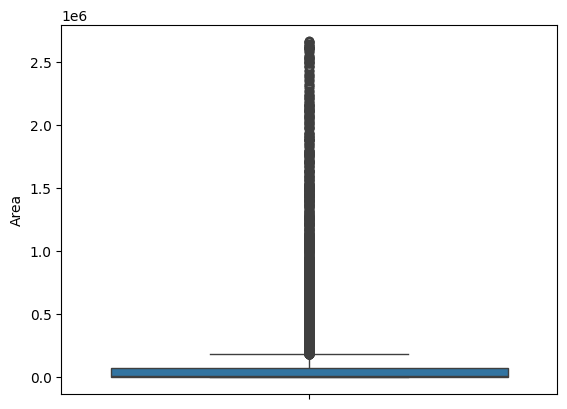

In [707]:
sns.boxplot(df['Area'])

In [708]:
# df['Area'] = np.log1p(df['Area'])

# this will automatically handle remaining outliers

## Production

In [709]:
upper_limit = df['Production'].quantile(0.99)
lower_limit = df['Production'].quantile(0.01)

print(lower_limit, upper_limit)

5.180000000000007 44905486.25999962


In [710]:
df.shape

(18419, 6)

In [711]:
df = df[(df['Production'] < upper_limit) & (df['Production'] > lower_limit)]
df

,Crop,Season,State,Area,Production,Annual_Rainfall
0,Arecanut,Whole Year,Assam,73814.0,56708,High
1,Arhar/Tur,Kharif,Assam,6637.0,4685,High
2,Castor seed,Kharif,Assam,796.0,22,High
4,Cotton(lint),Kharif,Assam,1739.0,794,High
5,Dry chillies,Whole Year,Assam,13587.0,9073,High
...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,4000.0,2000,Mid
19685,Wheat,Rabi,Nagaland,1000.0,3000,Mid
19686,Maize,Kharif,Jammu and Kashmir,310883.0,440900,Mid
19687,Rice,Kharif,Jammu and Kashmir,275746.0,5488,Mid


<Axes: ylabel='Production'>

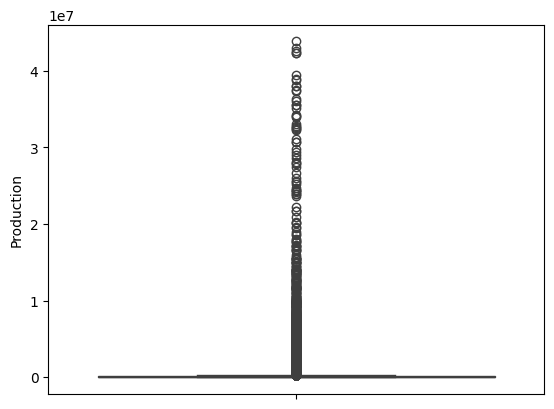

In [712]:
sns.boxplot(df['Production'])

In [713]:
# df['Production'] = np.log1p(df['Production'])

# this will automatically handle remaining outliers

In [714]:
df.shape

(18049, 6)

In [715]:
df

,Crop,Season,State,Area,Production,Annual_Rainfall
0,Arecanut,Whole Year,Assam,73814.0,56708,High
1,Arhar/Tur,Kharif,Assam,6637.0,4685,High
2,Castor seed,Kharif,Assam,796.0,22,High
4,Cotton(lint),Kharif,Assam,1739.0,794,High
5,Dry chillies,Whole Year,Assam,13587.0,9073,High
...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,4000.0,2000,Mid
19685,Wheat,Rabi,Nagaland,1000.0,3000,Mid
19686,Maize,Kharif,Jammu and Kashmir,310883.0,440900,Mid
19687,Rice,Kharif,Jammu and Kashmir,275746.0,5488,Mid


In [716]:
df.describe()

,Area,Production
count,1.804900e+04,1.804900e+04
mean,1.169465e+05,4.510763e+05
std,3.072840e+05,2.219072e+06
min,5.000000e+00,6.000000e+00
25%,1.615000e+03,1.672000e+03
50%,9.816000e+03,1.512900e+04
75%,7.300000e+04,1.171000e+05
max,2.660500e+06,4.383806e+07


In [ ]:
# df.to_csv("data/final_data.csv", index=False)